# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [22]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(0)

In [23]:
# Read in the data set
df = pd.read_csv('ames.csv', index_col=0)

df.head()

,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
Year_Built,,,,,,,,,,,,,
1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


In [24]:
# Clean and pre-process the data if neccessary
missing_values_count = df.isnull().sum()

missing_values_count[:]

Year_Remod_Add    0
Total_Bsmt_SF     0
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
Full_Bath         0
Half_Bath         0
Bedroom_AbvGr     0
Kitchen_AbvGr     0
TotRms_AbvGrd     0
Fireplaces        0
Garage_Area       0
Sale_Price        0
dtype: int64

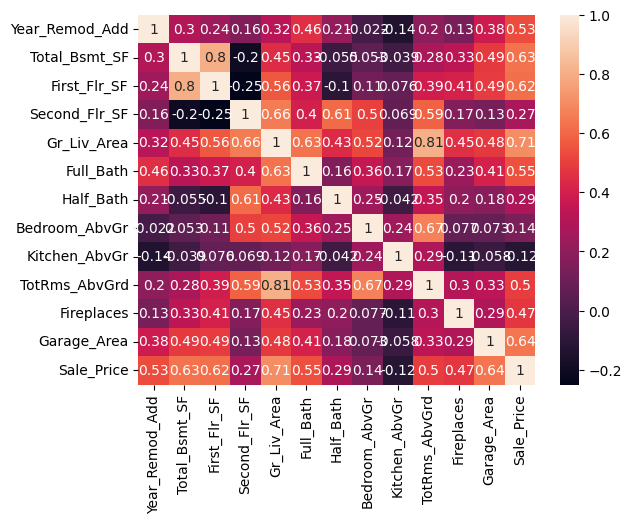

In [25]:
# Explore the data with visualisations such as histograms and correlation matrices
# Plot correlation matrix
plt.figure()
corr_coeff_mat = df.corr()
sns.heatmap(corr_coeff_mat, annot=True)
plt.show()
plt.close()

<Axes: xlabel='Gr_Liv_Area', ylabel='Count'>

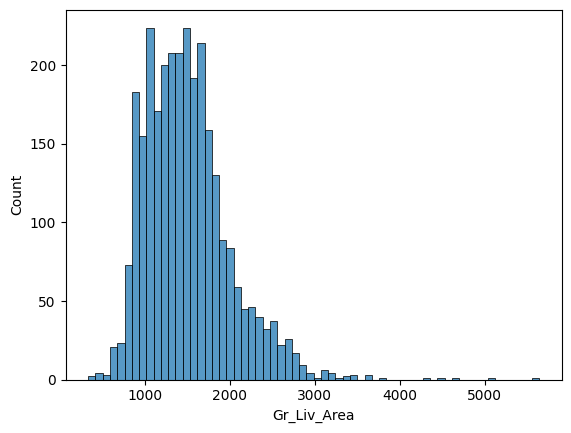

In [26]:
# Plotted histogram for Gr_Liv_Area to try and gauge the distribution of the data
sns.histplot(df['Gr_Liv_Area'])


<Axes: xlabel='Garage_Area', ylabel='Count'>

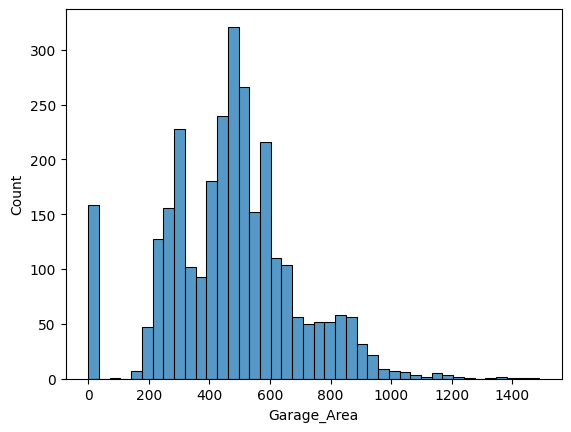

In [27]:
# Plotted histogram for Garage_Area to try and gauge the distribution of the data
sns.histplot(df['Garage_Area'])

In [28]:
# Split the independent variables from the dependent variable
X = df[['Gr_Liv_Area', 'Garage_Area']]
y = df['Sale_Price']

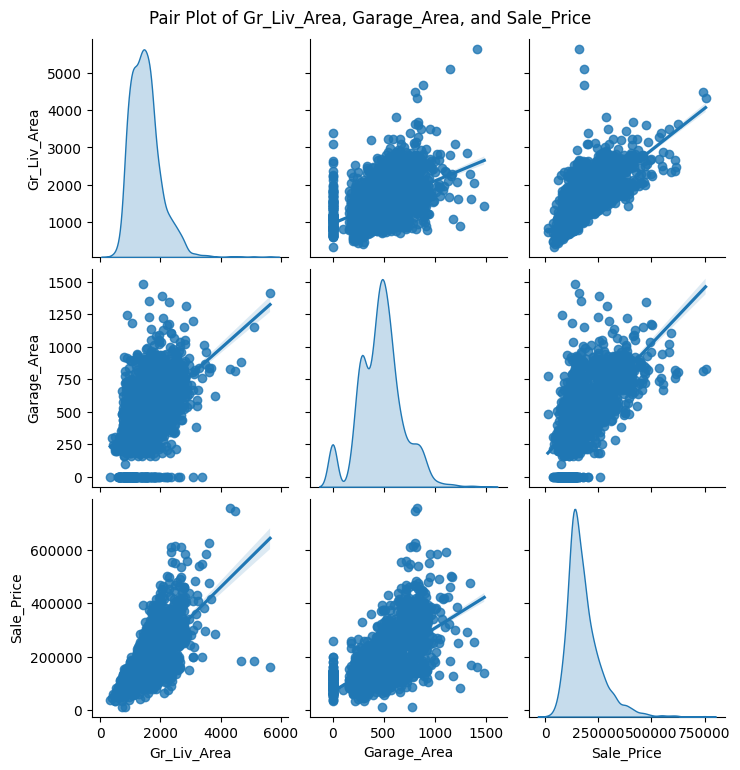

In [29]:
# Explore relationships between the independent and dependent variables
# Select relevant columns
plot_data = df[['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']]

# Pairplot
sns.pairplot(plot_data, kind='reg', diag_kind='kde')
plt.suptitle("Pair Plot of Gr_Liv_Area, Garage_Area, and Sale_Price", y=1.02)
plt.show()

In [30]:
# Create a training and test set with a 75:25 split ratio

# Split data into training and test sets
rseed = 23 # Use the same random seed for learning purposes to get the same result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,  random_state=rseed)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)


Training data: (2197, 2) (2197,)
Test data: (733, 2) (733,)


In [37]:
# Normalizing data using MinMaxScaler()

# Fit the scaler on train data
sc = MinMaxScaler()
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [38]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'
# Selected 'Gr_Liv_Area' and 'Garage_Area' as independent variables and assigned them to variable X and then reshaped data

X = df.iloc[:,[4, 11]].values
y = df.iloc[:,12].values
y = y.reshape(-1, 1)
X = X.reshape(-1, X.shape[1])

# Created an empty regression model
ames_model = LinearRegression()

# Fit on to model
ames_model.fit(X,y)

LinearRegression()

In [39]:
# Print the model intercept and coefficients
print('Intercept: \n', ames_model.intercept_)
print('Coefficients: \n', ames_model.coef_)

Intercept: 
 [-10365.25158597]
Coefficients: 
 [[ 81.92294905 144.50658946]]


In [ ]:
# Generate predictions for the test set

# Fit a model on the training data 
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Create line coordinates
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = lm.predict(X_line)

predictions[0:5]

array([105306.53797291, 159127.88786951, 167769.09690901,  58900.98948901,
       364961.45947664])

In [41]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)

print("RMSE:", rmse)

MSE: 2835241787.288366
RMSE: 53246.9885278817


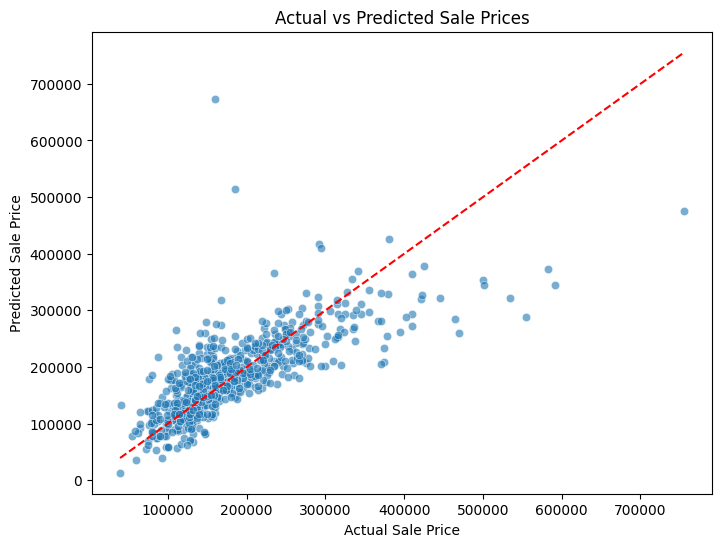

In [42]:
# Generate a plot

# Plot predictions vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices")
plt.show()

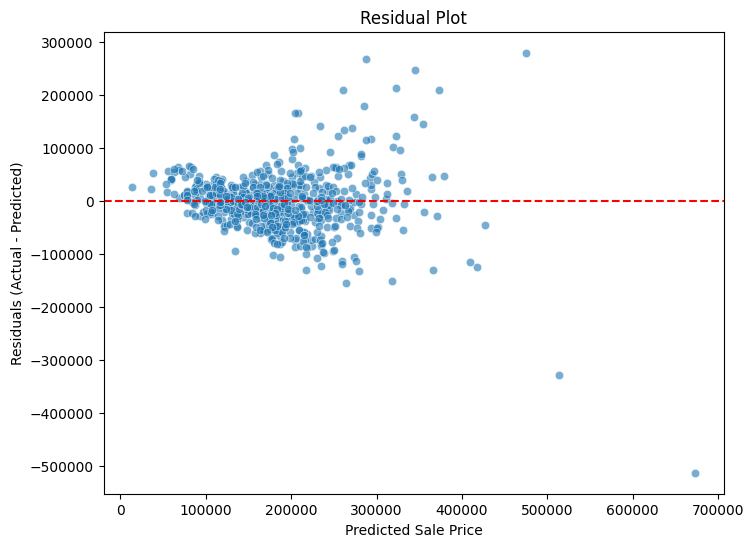

In [43]:
# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

In [48]:
# Print the coefficients

print("Intercept", model.intercept_)

# Coefficients for each feature
coefficients = (model.coef_)
print("Coefficients:", coefficients)

Intercept 19596.191386996885
Coefficients: [403196.70350595 213494.61081906]


In [49]:
print ("R2 Score:", round (model.score(X_test, y_test), 4))

R2 Score: 0.5696


In [52]:
from scipy.stats import zscore

# Compute z-scores for relevant numeric columns
z_scores = np.abs(zscore(df[['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']]))

# Define a threshold for being an outlier
threshold = 3

# Identify rows where any feature's z-score exceeds the threshold
outliers = (z_scores > threshold).any(axis=1)

# Show outliers
df_outliers = df[outliers]
print(f"Number of outliers detected: {df_outliers.shape[0]}")
df_outliers.head()

Number of outliers detected: 70


,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
Year_Built,,,,,,,,,,,,,
2003,2003,1650,1690,1589,3279,3,1,4,1,12,1,841,538000
2009,2010,2330,2364,0,2364,2,1,2,1,11,2,820,611657
2003,2004,2846,2696,0,2696,2,1,3,1,10,2,958,500000
1995,1996,2033,2053,1185,3238,2,1,4,1,9,1,666,410000
1990,1990,1673,1699,1523,3222,3,0,5,1,11,2,594,320000


**Interpret coefficients in the context of the prediction:**
If Gr_Liv_Area increases from its minimum to its maximum, the predicted Sale Price increases by $403,197, assuming Garage_Area stays constant.

If Garage_Area increases from its minimum to its maximum, the predicted Sale Price increases by $213,495, holding Gr_Liv_Area constant.

Gr_Liv_Area has nearly double the impact on sale price compared to Garage_Area in the normalized space.

**Summarise findings**

From the correlation matrix we can see a strong positive correlation between Gr_Liv_Area and SalePrice, and a moderate correlation for Garage_Area.

From the scatter plotswe can see Gr_Liv_Area vs SalePrice: Clear linear relationship, some outliers visible at high square footage values.
Garage_Area vs SalePrice: Moderate linearity, more scatter, possibly lower predictive power.

MSE and RMSE were relatively high — suggesting model error is substantial.
R² Score: Moderate — model explains some, but not all, of the variance in house prices. These high values could be due to extreme outliers. Using zscore analysis, it can be seen that there are 70 outliers present may have affected these values

From the residual plot it showed no strong pattern, indicating linear assumptions might hold. Slight fan shape possibly hints at heteroscedasticity (variance increasing with predicted price).